In [1]:
# four models stability test
import json
import os
import pandas as pd

In [8]:
# four models stability test - results
import json
import os
import pandas as pd

# ✅ 正确路径（你实际生成文件的位置）
base_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test"
json_path = os.path.join(base_path, "stability_results_4models.json")

# 加载结果 JSON
with open(json_path, 'r') as f:
    results = json.load(f)

# 打印结构示例
for test_size, seeds_dict in results.items():
    print(f"\n📦 Test Size: {test_size}")
    for seed, content in seeds_dict.items():
        print(f"  🌱 Seed: {seed}")
        print(f"    - Best Params: {content['best_params']}")
        print(f"    - # of Feature Importances: {len(content['feature_importance'])}")
        print(f"    - Metrics Sample: {content['metrics'][:1]}")

# 提取所有 feature importance 到一个 DataFrame
all_importances = []
all_importance_diffs = []

for test_size, seeds_dict in results.items():
    for seed, content in seeds_dict.items():
        for fi in content['feature_importance']:
            fi['test_size'] = test_size
            fi['seed'] = seed
            all_importances.append(fi)

        for diff in content['feature_importance_diff']:
            diff['test_size'] = test_size
            diff['seed'] = seed
            all_importance_diffs.append(diff)

df_importance = pd.DataFrame(all_importances)
df_importance_diff = pd.DataFrame(all_importance_diffs)

# 显示一个 diff 的例子
print("\n🎯 Example of feature importance diff:")
if not df_importance_diff.empty:
    print(df_importance_diff.iloc[0])
    print("\n📌 Columns:", df_importance_diff.columns.tolist())
else:
    print("No feature importance diff data found.")

# 可选：保存为 CSV
# df_importance_diff.to_csv("importance_diff_all.csv", index=False)



📦 Test Size: test_size_0.3
  🌱 Seed: seed_0
    - Best Params: {'latent_dim': 128, 'hidden_dim_factor': 0.5, 'lr': 0.0005531550718219679, 'supervisor_hidden_dim': 32, 'epochs': 30, 'batch_size': 32}
    - # of Feature Importances: 5430
    - Metrics Sample: [{'method': 'DirectPred', 'var': 'clin', 'variable_type': 'categorical', 'metric': 'balanced_acc', 'value': 0.8430880713489408}]
  🌱 Seed: seed_1
    - Best Params: {'latent_dim': 73, 'hidden_dim_factor': 0.3678138407876077, 'lr': 0.000547649409010693, 'supervisor_hidden_dim': 28, 'epochs': 56, 'batch_size': 32}
    - # of Feature Importances: 5430
    - Metrics Sample: [{'method': 'DirectPred', 'var': 'clin', 'variable_type': 'categorical', 'metric': 'balanced_acc', 'value': 0.7960088691796009}]
  🌱 Seed: seed_2
    - Best Params: {'latent_dim': 78, 'hidden_dim_factor': 0.261489136822575, 'lr': 0.00824205697097529, 'supervisor_hidden_dim': 12, 'epochs': 13, 'batch_size': 128}
    - # of Feature Importances: 5430
    - Metrics Samp

In [10]:
import pandas as pd

# 1. 提取参数的部分，和你之前一样
param_rows = []
for test_size, seeds_dict in results.items():
    for seed, content in seeds_dict.items():
        param_row = {
            "test_size": float(test_size.split("_")[-1]),
            "seed": int(seed.split("_")[-1])
        }
        param_row.update(content["best_params"])
        param_rows.append(param_row)
df_params = pd.DataFrame(param_rows)

# 2. 定义这个函数（你的metrics_long_to_wide）
def metrics_long_to_wide(results_dict):
    rows = []
    for test_size_key, seeds_dict in results_dict.items():
        test_size = float(test_size_key.split('_')[-1])
        for seed_key, content in seeds_dict.items():
            seed = int(seed_key.split('_')[-1])
            metrics = content['metrics']

            if isinstance(metrics, list):
                df_metrics = pd.DataFrame(metrics)
            else:
                df_metrics = pd.DataFrame([metrics])

            df_metrics['test_size'] = test_size
            df_metrics['seed'] = seed

            rows.append(df_metrics)

    all_metrics_df = pd.concat(rows, ignore_index=True)

    df_wide = all_metrics_df.pivot_table(
        index=['test_size', 'seed'],
        columns='metric',
        values='value'
    )

    df_wide.columns.name = None
    df_wide = df_wide.sort_index().sort_index(axis=1)

    return df_wide

# 3. 使用函数生成宽格式 df_metrics
df_metrics = metrics_long_to_wide(results)

# 4. 查看结果
print(df_params.head())
print(df_metrics.head())


   test_size  seed  latent_dim  hidden_dim_factor        lr  \
0        0.3     0         128           0.500000  0.000553   
1        0.3     1          73           0.367814  0.000548   
2        0.3     2          78           0.261489  0.008242   
3        0.3     5         103           0.345603  0.003921   
4        0.3    10         124           0.472357  0.003456   

   supervisor_hidden_dim  epochs  batch_size  
0                     32      30          32  
1                     28      56          32  
2                     12      13         128  
3                     15      21         128  
4                     31      24         128  
                average_aupr  average_auroc  balanced_acc  f1_score     kappa  \
test_size seed                                                                  
0.3       0         0.950995       0.934225      0.843088  0.846415  0.690216   
          1         0.921293       0.911308      0.796009  0.796950  0.596481   
          2    

In [15]:
df_params

test_size  seed  latent_dim  hidden_dim_factor        lr  \
0         0.3     0         128           0.500000  0.000553   
1         0.3     1          73           0.367814  0.000548   
2         0.3     2          78           0.261489  0.008242   
3         0.3     5         103           0.345603  0.003921   
4         0.3    10         124           0.472357  0.003456   
5         0.3    12          76           0.375821  0.001141   
6         0.3    13          66           0.473375  0.002129   
7         0.3    15         110           0.283332  0.001539   
8         0.3    20          16           0.500000  0.001414   
9         0.3    25          16           0.248046  0.010000   
10        0.3    30          82           0.240594  0.002131   
11        0.3    32         128           0.500000  0.010000   
12        0.3    42         114           0.333155  0.005096   
13        0.3    48          58           0.472267  0.008863   
14        0.3  2023          33           0.235739  0.001766   
15        0.3  2024          37           0.439459  0.005878   
16        0.3  2025         122           0.500000  0.002909   
17        0.3  2026          90           0.426141  0.001316   
18        0.3  2027          72           0.347150  0.002494   
19        0.3  2030         128           0.500000  0.010000   

    supervisor_hidden_dim  epochs  batch_size  
0                      32      30          32  
1                      28      56          32  
2                      12      13         128  
3                      15      21         128  
4                      31      24         128  
5                      31      59          64  
6                      23      37         128  
7                      20      49          32  
8                      26      60          32  
9                      21      18          32  
10                     12      31          32  
11                      8      11          64  
12                     22      19          64  
13                     23      88         128  
14                     23      33         128  
15                     11      22          64  
16                     25      22         128  
17                     32      19          64  
18                     20      44          32  
19                     14      30         128

In [16]:
df_metrics

average_aupr  average_auroc  balanced_acc  f1_score     kappa  \
test_size seed                                                                  
0.3       0         0.950995       0.934225      0.843088  0.846415  0.690216   
          1         0.921293       0.911308      0.796009  0.796950  0.596481   
          2         0.930042       0.931818      0.855322  0.857075  0.715402   
          5         0.932219       0.944820      0.868806  0.859293  0.719780   
          10        0.948427       0.941209      0.851624  0.847483  0.694498   
          12        0.920019       0.928571      0.799003  0.798436  0.599168   
          13        0.962841       0.964563      0.905869  0.905882  0.811739   
          15        0.935981       0.931894      0.847176  0.847059  0.694160   
          20        0.884186       0.891377      0.788914  0.796786  0.588202   
          25        0.807698       0.861111      0.701531  0.695817  0.391520   
          30        0.946035       0.942968      0.859635  0.858235  0.718076   
          32        0.960858       0.958194      0.928930  0.929412  0.857860   
          42        0.964411       0.973244      0.930881  0.929510  0.858412   
          48        0.895209       0.889075      0.793757  0.798305  0.593301   
          2023      0.882099       0.907530      0.857697  0.857401  0.716981   
          2024      0.934336       0.932447      0.823090  0.823236  0.646717   
          2025      0.924866       0.929444      0.851389  0.846762  0.696011   
          2026      0.939343       0.938333      0.873611  0.870588  0.742069   
          2027      0.917673       0.913621      0.812292  0.811452  0.623894   
          2030      0.956898       0.973356      0.928571  0.918128  0.835590   

                precision    recall  
test_size seed                       
0.3       0      0.847919  0.847059  
          1      0.812736  0.800000  
          2      0.871219  0.858824  
          5      0.875033  0.858824  
          10     0.853768  0.847059  
          12     0.808000  0.800000  
          13     0.905882  0.905882  
          15     0.847293  0.847059  
          20     0.805018  0.800000  
          25     0.709821  0.694118  
          30     0.866335  0.858824  
          32     0.929412  0.929412  
          42     0.930638  0.929412  
          48     0.802307  0.800000  
          2023   0.871742  0.858824  
          2024   0.825005  0.823529  
          2025   0.858079  0.847059  
          2026   0.876634  0.870588  
          2027   0.814755  0.811765  
          2030   0.931053  0.917647

In [17]:
# hp stability
import pandas as pd

def compute_cv_by_test_size(df_params):
    # 选出要计算CV的数值参数列（排除非超参数的如 seed、test_size）
    exclude_cols = ['test_size', 'seed']
    param_cols = [col for col in df_params.columns if col not in exclude_cols]
    
    # 分组计算均值和标准差
    grouped = df_params.groupby('test_size')[param_cols]
    means = grouped.mean()
    stds = grouped.std()

    # 计算变异系数 CV = std / mean
    cv = stds / means
    cv.columns = [col + '_cv' for col in cv.columns]
    cv.reset_index(inplace=True)

    return cv
df_params_cv = compute_cv_by_test_size(df_params)
df_params_cv



test_size  latent_dim_cv  hidden_dim_factor_cv    lr_cv  \
0        0.3       0.449179              0.253396  0.81877   

   supervisor_hidden_dim_cv  epochs_cv  batch_size_cv  
0                  0.348044   0.571787        0.55358


📊 变异系数（CV）表格:
                                 0
test_size                 0.300000
latent_dim_cv             0.449179
hidden_dim_factor_cv      0.253396
lr_cv                     0.818770
supervisor_hidden_dim_cv  0.348044
epochs_cv                 0.571787
batch_size_cv             0.553580


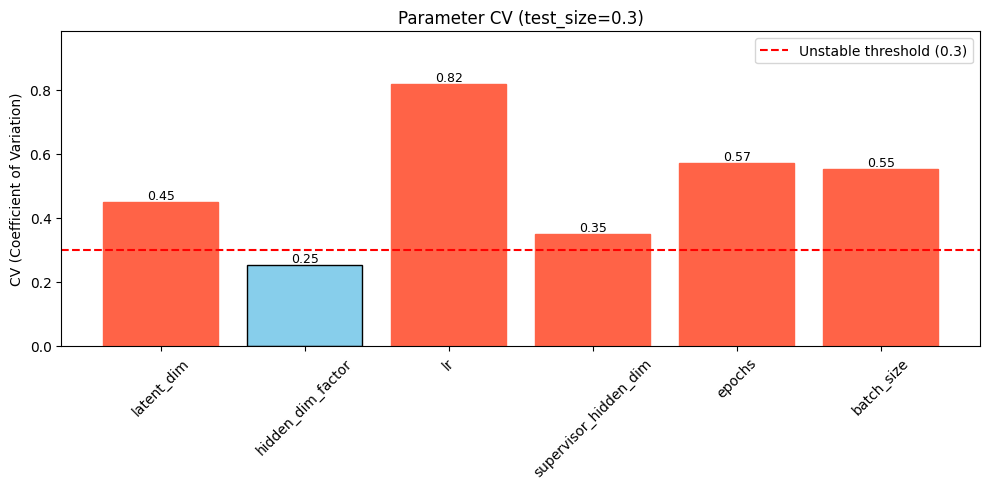

In [23]:
# =============== Ploting ==================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def compute_and_plot_cv(df_params, group_col='test_size'):
    # 筛选超参数列（排除非超参数字段）
    param_cols = [col for col in df_params.columns if col not in [group_col, 'seed']]
    
    # 按 test_size 分组计算每列的CV
    stability_summary = []

    for test_size, group in df_params.groupby(group_col):
        summary = {'test_size': test_size}
        for param in param_cols:
            mean = group[param].mean()
            std = group[param].std()
            cv = std / mean if mean != 0 else np.nan
            summary[f'{param}_cv'] = cv
        stability_summary.append(summary)

    df_cv = pd.DataFrame(stability_summary)

    # 打印数值结果
    print("\n📊 变异系数（CV）表格:")
    print(df_cv.T)

    # 绘图
    for _, row in df_cv.iterrows():
        test_size = row['test_size']
        param_cvs = row.drop('test_size')
        param_names = [col.replace('_cv', '') for col in param_cvs.index]
        cv_values = param_cvs.values

        plt.figure(figsize=(10, 5))
        bars = plt.bar(param_names, cv_values, color='skyblue', edgecolor='black')
        
        # 标出不稳定（CV > 0.3）参数
        for bar, val in zip(bars, cv_values):
            if val > 0.3:
                bar.set_color('tomato')
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:.2f}', 
                     ha='center', va='bottom', fontsize=9)

        plt.title(f'Parameter CV (test_size={test_size})')
        plt.ylabel('CV (Coefficient of Variation)')
        plt.xticks(rotation=45)
        plt.ylim(0, max(cv_values)*1.2)
        plt.axhline(0.3, color='red', linestyle='--', label='Unstable threshold (0.3)')
        plt.legend()
        plt.tight_layout()
        plt.show()

    return df_cv

# 🔧 用你的 df_params 调用函数：
df_cv = compute_and_plot_cv(df_params)


📊 变异系数（CV）表格:
                              0
test_size                0.3000
latent_dim_cv            0.4492
hidden_dim_factor_cv     0.2534
lr_cv                    0.8188
supervisor_hidden_dim_cv 0.3480
epochs_cv                0.5718
batch_size_cv            0.5536
Figure saved to: C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures\hyper_parameter_cv.png


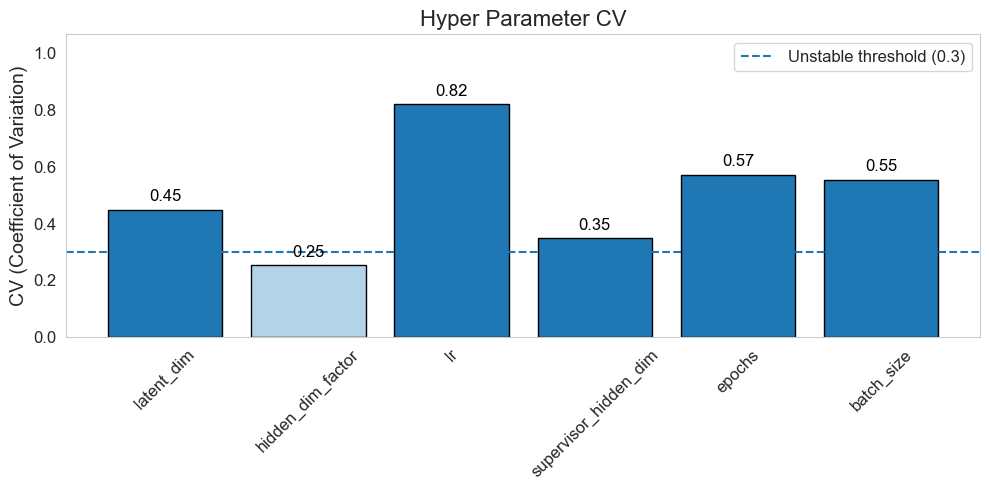

In [209]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def compute_and_plot_cv(df_params, group_col='test_size', save_dir=None):
    param_cols = [col for col in df_params.columns if col not in [group_col, 'seed']]
    stability_summary = []

    for test_size, group in df_params.groupby(group_col):
        summary = {'test_size': test_size}
        for param in param_cols:
            mean = group[param].mean()
            std = group[param].std()
            cv = std / mean if mean != 0 else np.nan
            summary[f'{param}_cv'] = cv
        stability_summary.append(summary)

    df_cv = pd.DataFrame(stability_summary)

    print("\n📊 变异系数（CV）表格:")
    print(df_cv.T)

    for _, row in df_cv.iterrows():
        test_size = row['test_size']
        param_cvs = row.drop('test_size')
        param_names = [col.replace('_cv', '') for col in param_cvs.index]
        cv_values = param_cvs.values

        plt.figure(figsize=(10, 5))

        norm = mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cv_values))
        cmap = plt.cm.Blues
        mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

        alert_color = '#1f77b4'

        colors = []
        for val in cv_values:
            if val > 0.3:
                colors.append(alert_color)
            else:
                colors.append(mappable.to_rgba(val))

        bars = plt.bar(param_names, cv_values, color=colors, edgecolor='black')

        for bar, val in zip(bars, cv_values):
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.02,  # 顶部稍微往上
                f'{val:.2f}',
                ha='center',
                va='bottom',
                fontsize=12,
                color='black'
            )

        title_str = f'Hyper Parameter CV'
        plt.title(title_str, fontsize=16)
        plt.ylabel('CV (Coefficient of Variation)', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim(0, max(cv_values) * 1.3)

        plt.axhline(0.3, color=alert_color, linestyle='--', label='Unstable threshold (0.3)')
        plt.legend(fontsize=12)
        plt.grid(False)
        plt.tight_layout()

        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            # 文件名用标题，转小写，空格转下划线，去点
            filename = title_str.lower().replace(' ', '_').replace('.', '') + '.png'
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300)
            print(f"Figure saved to: {filepath}")

        plt.show()

    return df_cv

# 调用示例（替换为你的目录）：
save_directory = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"

df_cv = compute_and_plot_cv(df_params, save_dir=save_directory)


In [70]:
# performance stability
def calc_stats_df_transposed(df, test_size):
    subset = df.loc[test_size]
    means = subset.mean()
    stds = subset.std()
    cv = stds / means

    stats_df = pd.DataFrame({
        'mean': means,
        'std': stds,
        'cv': cv
    }).T  # 转置

    return stats_df

df_stats_0_3 = calc_stats_df_transposed(df_metrics, 0.3)



print("\nStats for test_size=0.3:")
df_stats_0_3



Stats for test_size=0.3:


average_aupr  average_auroc  balanced_acc  f1_score     kappa  \
mean      0.925771       0.929956      0.845860  0.844711  0.689504   
std       0.036764       0.028460      0.055949  0.055015  0.110126   
cv        0.039712       0.030604      0.066144  0.065129  0.159718   

      precision    recall  
mean   0.852133  0.845294  
std    0.053309  0.054820  
cv     0.062559  0.064854

In [70]:
# performance stability
def calc_stats_df_transposed(df, test_size):
    subset = df.loc[test_size]
    means = subset.mean()
    stds = subset.std()
    cv = stds / means

    stats_df = pd.DataFrame({
        'mean': means,
        'std': stds,
        'cv': cv
    }).T  # 转置

    return stats_df

df_stats_0_3 = calc_stats_df_transposed(df_metrics, 0.3)



print("\nStats for test_size=0.3:")
df_stats_0_3



Stats for test_size=0.3:


average_aupr  average_auroc  balanced_acc  f1_score     kappa  \
mean      0.925771       0.929956      0.845860  0.844711  0.689504   
std       0.036764       0.028460      0.055949  0.055015  0.110126   
cv        0.039712       0.030604      0.066144  0.065129  0.159718   

      precision    recall  
mean   0.852133  0.845294  
std    0.053309  0.054820  
cv     0.062559  0.064854

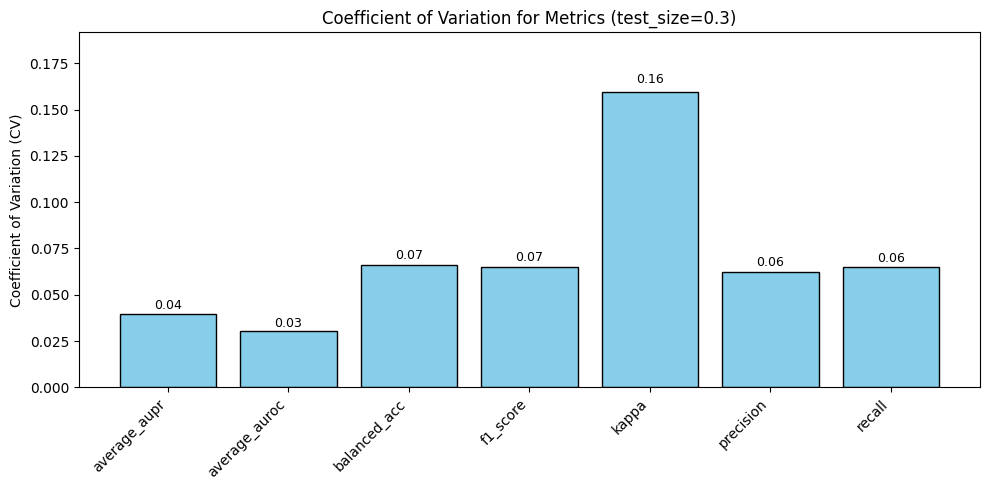

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cv_bar(stats_df, test_size):
    cv_values = stats_df.loc['cv']
    metrics = cv_values.index

    plt.figure(figsize=(10, 5))
    bars = plt.bar(metrics, cv_values, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Coefficient of Variation (CV)')
    plt.title(f'Coefficient of Variation for Metrics (test_size={test_size})')
    plt.ylim(0, max(cv_values)*1.2)

    # 标注数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height * 1.02, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

plot_cv_bar(df_stats_0_3, 0.3)

# Loss calculation

   test_size  seed      loss  iter
0        0.3     0  0.578248     1
1        0.3     0  0.454152     2
2        0.3     0  0.433123     3
3        0.3     0  0.393780     4
4        0.3     0  0.439512     5


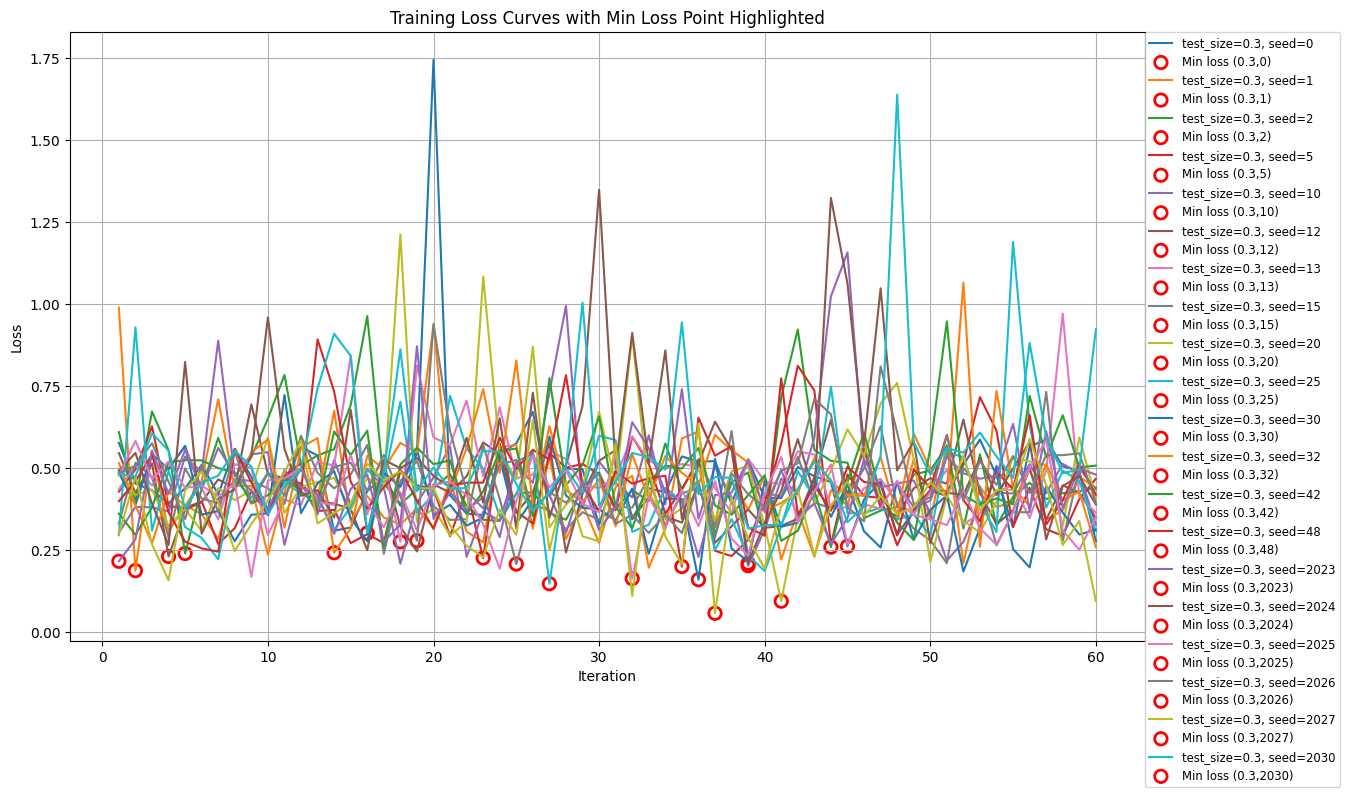

In [30]:
import pandas as pd

# 加载 df_all_losses
losses_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test\df_all_losses.csv"
df_all_losses = pd.read_csv(losses_path)

# 查看前几行确认
print(df_all_losses.head())

import matplotlib.pyplot as plt

def plot_loss_curves_min_point(df_losses):
    plt.figure(figsize=(16, 8))
    
    groups = df_losses.groupby(['test_size', 'seed'])
    
    for (test_size, seed), group in groups:
        group = group.sort_values('iter')
        plt.plot(group['iter'], group['loss'], label=f'test_size={test_size}, seed={seed}')
        
        min_idx = group['loss'].idxmin()
        min_point = group.loc[min_idx]
        plt.scatter(
            min_point['iter'],
            min_point['loss'],
            s=80,
            edgecolors='red',
            facecolors='none',
            linewidths=2,
            label=f'Min loss ({test_size},{seed})'
        )
    
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss Curves with Min Loss Point Highlighted')
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1, 1),
        fontsize='small',
        borderaxespad=0.,
        ncol=1
    )
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.grid(False)
    plt.show()
plot_loss_curves_min_point(df_all_losses)


Figure saved to: C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures\training_loss_curves_with_min_loss_point_highlighted.png


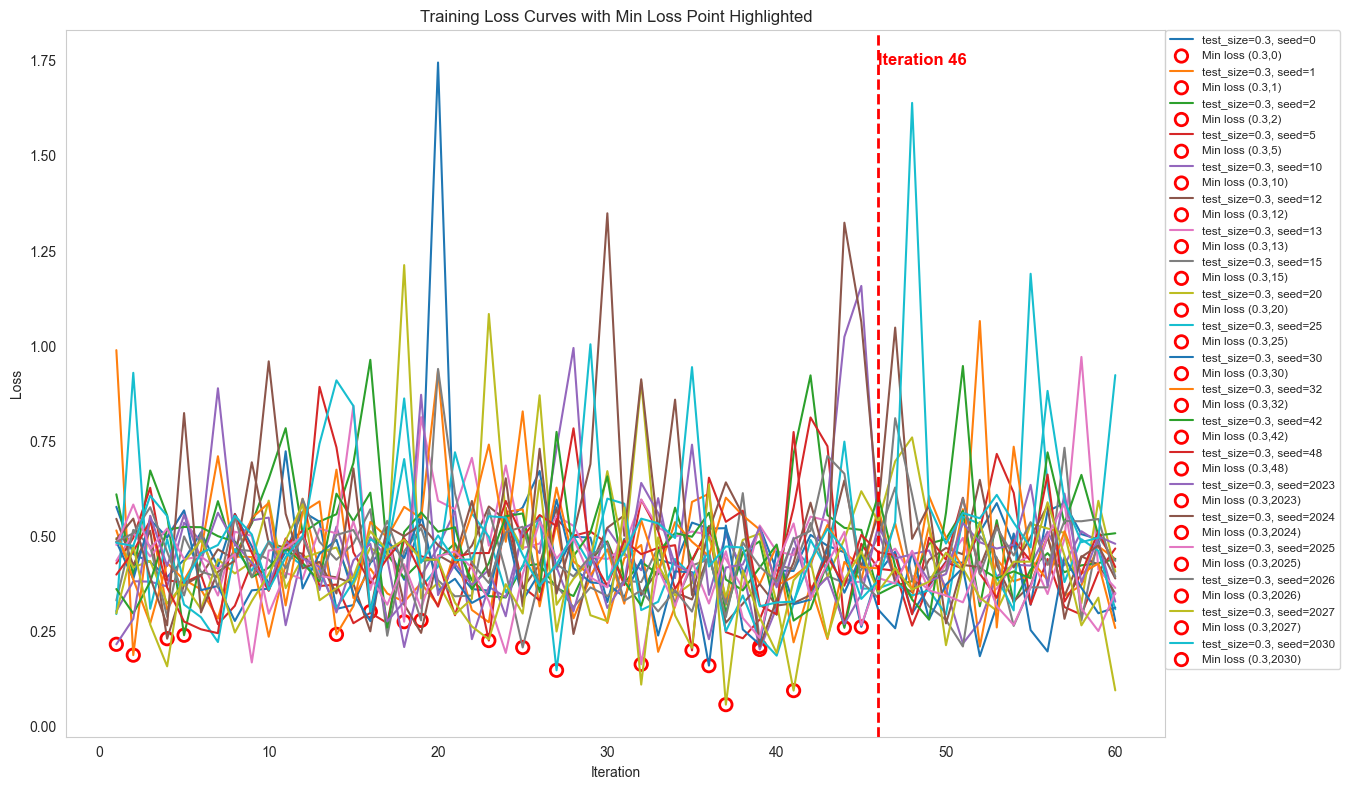

In [217]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curves_min_point(df_losses, save_dir=None):
    plt.figure(figsize=(16, 8))
    
    groups = df_losses.groupby(['test_size', 'seed'])
    
    for (test_size, seed), group in groups:
        group = group.sort_values('iter')
        plt.plot(group['iter'], group['loss'], label=f'test_size={test_size}, seed={seed}')
        
        min_idx = group['loss'].idxmin()
        min_point = group.loc[min_idx]
        plt.scatter(
            min_point['iter'],
            min_point['loss'],
            s=80,
            edgecolors='red',
            facecolors='none',
            linewidths=2,
            label=f'Min loss ({test_size},{seed})'
        )
    
    plt.axvline(x=46, color='red', linestyle='--', linewidth=2)
    # 文字标注在46，纵坐标顶部95%
    plt.text(46, plt.ylim()[1]*0.95, 'Iteration 46', color='red', fontsize=12, fontweight='bold')

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    title_str = 'Training Loss Curves with Min Loss Point Highlighted'
    plt.title(title_str)
    plt.legend(
        loc='upper left',
        bbox_to_anchor=(1, 1),
        fontsize='small',
        borderaxespad=0.,
        ncol=1
    )
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.grid(False)
    
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        filename = title_str.lower().replace(' ', '_').replace('.', '') + '.png'
        filepath = os.path.join(save_dir, filename)
        plt.savefig(filepath, dpi=300)
        print(f"Figure saved to: {filepath}")
    
    plt.show()

# 示例调用（替换成你的保存路径）
save_directory = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
plot_loss_curves_min_point(df_all_losses, save_dir=save_directory)


# df loss calculation

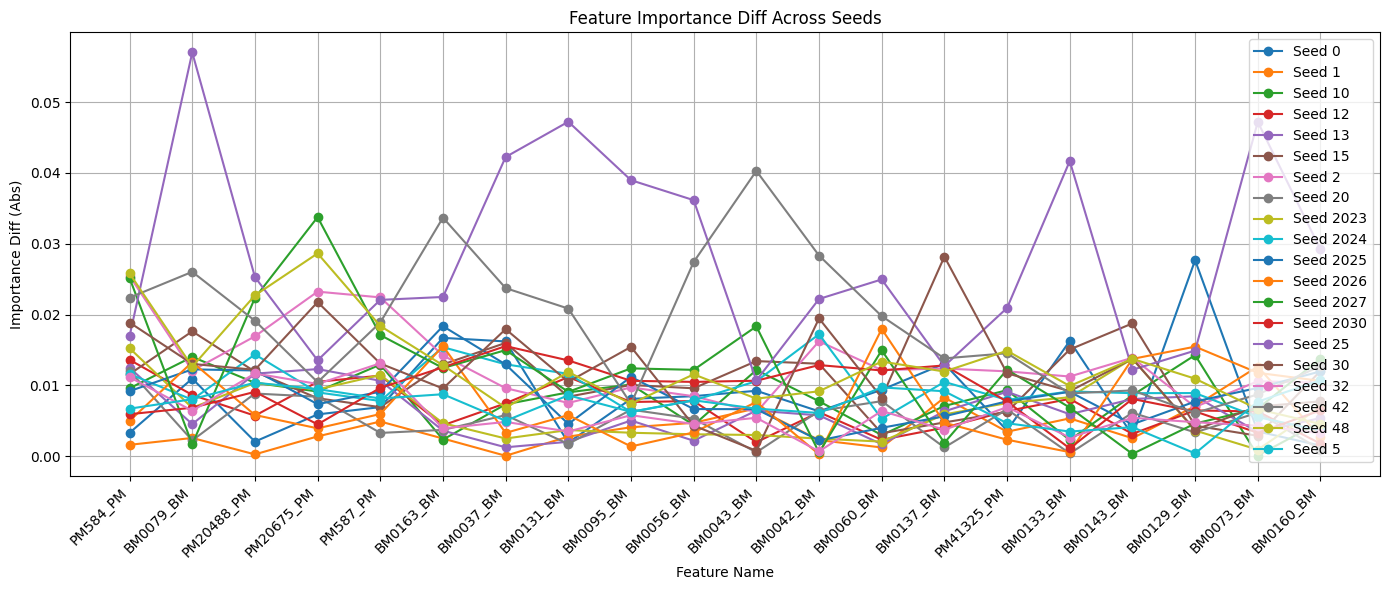

In [33]:
def plot_feature_importance_diff_from_csv(csv_path, top_k=30):
    df = pd.read_csv(csv_path)

    # 找出所有 seed 列
    seed_cols = [col for col in df.columns if col.startswith('seed_seed_')]

    # 宽转长，变成长格式
    df_long = df.melt(id_vars=['feature_name'], value_vars=seed_cols,
                      var_name='seed', value_name='importance_diff_abs')

    # 清理 seed 名称，比如去掉 'seed_seed_'
    df_long['seed'] = df_long['seed'].str.replace('seed_seed_', '')

    # 选 top_k 平均 importance_diff_abs 最大的特征
    top_features = (
        df_long.groupby('feature_name')['importance_diff_abs']
        .mean()
        .sort_values(ascending=False)
        .head(top_k)
        .index.tolist()
    )

    df_filtered = df_long[df_long['feature_name'].isin(top_features)]

    # 按 seed 分组
    grouped = df_filtered.groupby('seed')

    # x 轴标签
    x_labels = top_features
    x_indices = range(len(x_labels))

    plt.figure(figsize=(14, 6))
    for seed, group in grouped:
        y_values = [group[group['feature_name'] == feat]['importance_diff_abs'].values[0]
                    if feat in group['feature_name'].values else 0 for feat in x_labels]
        plt.plot(x_indices, y_values, label=f'Seed {seed}', marker='o')

    plt.xticks(ticks=x_indices, labels=x_labels, rotation=45, ha='right')
    plt.xlabel("Feature Name")
    plt.ylabel("Importance Diff (Abs)")
    plt.title("Feature Importance Diff Across Seeds")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
csv_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test\feature_importance_diff_plot_data.csv"
plot_feature_importance_diff_from_csv(csv_path, top_k=25)

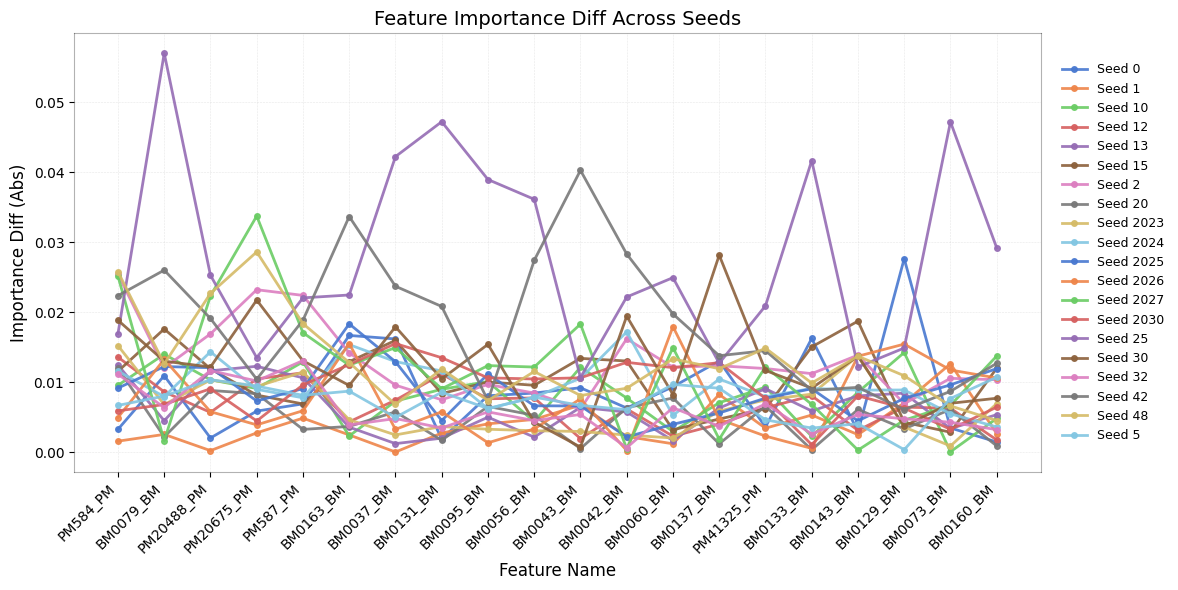

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance_diff_from_csv(csv_path, top_k=30):
    df = pd.read_csv(csv_path)

    seed_cols = [col for col in df.columns if col.startswith('seed_seed_')]

    df_long = df.melt(id_vars=['feature_name'], value_vars=seed_cols,
                      var_name='seed', value_name='importance_diff_abs')

    df_long['seed'] = df_long['seed'].str.replace('seed_seed_', '')

    top_features = (
        df_long.groupby('feature_name')['importance_diff_abs']
        .mean()
        .sort_values(ascending=False)
        .head(top_k)
        .index.tolist()
    )

    df_filtered = df_long[df_long['feature_name'].isin(top_features)]
    grouped = df_filtered.groupby('seed')

    morandi_deep = [
        '#7F7C96', '#A68A79', '#7A7879', '#A87060', '#799276',
        '#927C7B', '#6E8395', '#A08A78', '#72988A', '#9C8673'
    ]

    if len(grouped) > len(morandi_deep):
        morandi_deep = sns.color_palette("muted", len(grouped))

    # 创建子图，留出右边空间给 legend
    fig, ax = plt.subplots(figsize=(14, 6))
    x_labels = top_features
    x_indices = range(len(x_labels))

    for idx, (seed, group) in enumerate(grouped):
        y_values = [group[group['feature_name'] == feat]['importance_diff_abs'].values[0]
                    if feat in group['feature_name'].values else 0 for feat in x_labels]
        ax.plot(
            x_indices,
            y_values,
            label=f'Seed {seed}',
            marker='o',
            markersize=4,
            linewidth=2,
            color=morandi_deep[idx % len(morandi_deep)],
            alpha=0.9
        )

    ax.set_xticks(ticks=x_indices)
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)
    ax.set_xlabel("Feature Name", fontsize=12)
    ax.set_ylabel("Importance Diff (Abs)", fontsize=12)
    ax.set_title("Feature Importance Diff Across Seeds", fontsize=14)

    # 弱化边框和 grid
    ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.3)
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_alpha(0.3)

    # legend 移到图外右边
    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.01, 0.5),
        frameon=False,
        fontsize=9
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # 留出右边空间给 legend
    plt.show()

# 调用
csv_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test\feature_importance_diff_plot_data.csv"
plot_feature_importance_diff_from_csv(csv_path, top_k=20)


# Feature selection stability

结果
Test Size: test_size_0.3
  Mean Spearman rank correlation: -0.6915
  Mean Kuncheva stability index: 0.1146

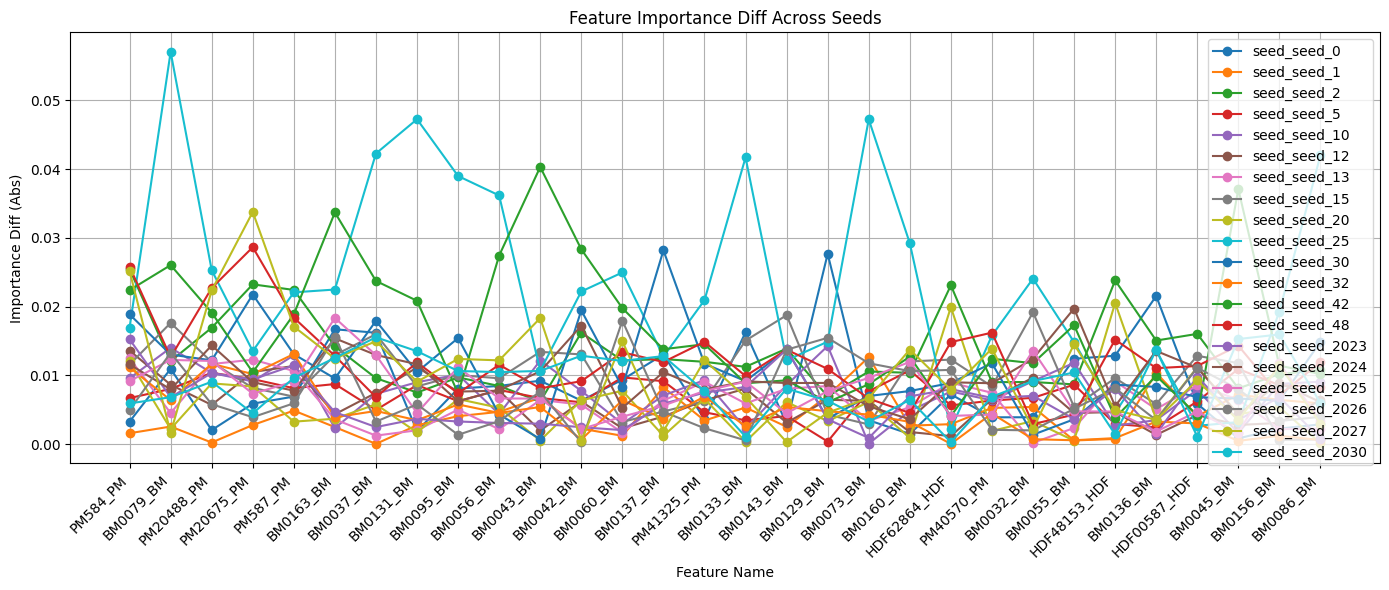

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance_diff_from_df(df_diff):
    # x轴是 feature 名
    x_labels = df_diff.index.tolist()
    x_indices = range(len(x_labels))

    # 开始绘图
    plt.figure(figsize=(14, 6))
    for col in df_diff.columns:
        y_values = df_diff[col].values
        plt.plot(x_indices, y_values, label=col, marker='o')

    plt.xticks(ticks=x_indices, labels=x_labels, rotation=45, ha='right')
    plt.xlabel("Feature Name")
    plt.ylabel("Importance Diff (Abs)")
    plt.title("Feature Importance Diff Across Seeds")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# ✅ 替换为你保存的路径
csv_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test\feature_importance_diff_plot_data.csv"

# 加载数据
df_diff_loaded = pd.read_csv(csv_path, index_col=0)

# 绘图
plot_feature_importance_diff_from_df(df_diff_loaded)


# Select HP

✅ DataFrame 加载成功，预览：
   test_size  seed      loss  iter  latent_dim  hidden_dim_factor        lr  \
0        0.3     0  0.578248     1         105           0.255030  0.003626   
1        0.3     0  0.454152     2          67           0.300113  0.000193   
2        0.3     0  0.433123     3         121           0.200234  0.009648   
3        0.3     0  0.393780     4          19           0.357432  0.000631   
4        0.3     0  0.439512     5          26           0.385516  0.000582   

   supervisor_hidden_dim  epochs  batch_size  
0                     22     300          32  
1                     24     300         128  
2                     23     300          32  
3                      9     300          32  
4                     32     300         128  


C:\Users\laura\Downloads\study software\anaconda\envs\flexynesis\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\laura\Downloads\study software\anaconda\envs\flexynesis\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


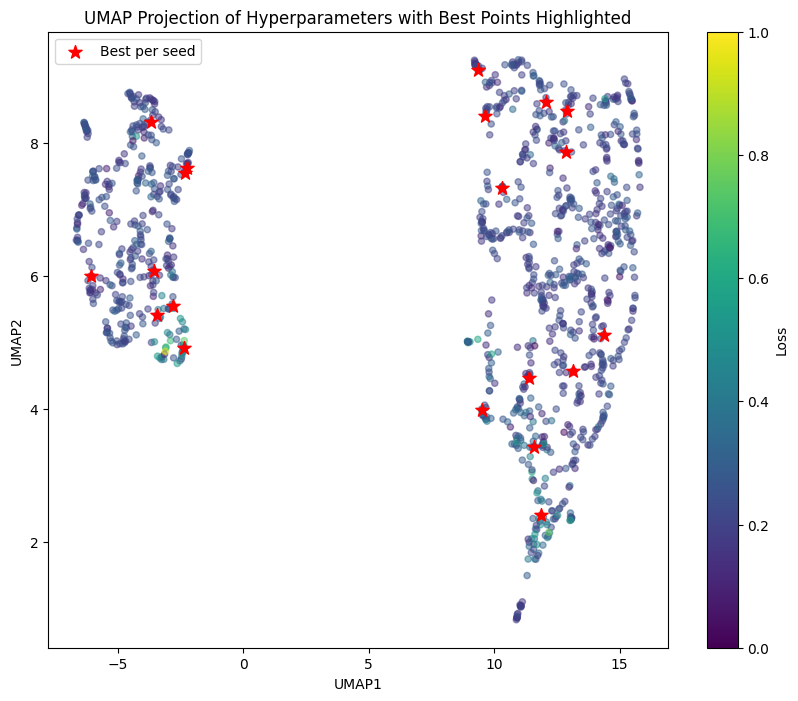

In [3]:
import pandas as pd
import os
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def load_configs(csv_path):
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"文件不存在：{csv_path}")
    df = pd.read_csv(csv_path)
    print("✅ DataFrame 加载成功，预览：")
    print(df.head())
    return df

if __name__ == "__main__":
    csv_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test\df_all_configs_with_loss.csv"
    df = load_configs(csv_path)  # 这里改名成 df，和后续代码保持一致

    param_cols = ['latent_dim', 'hidden_dim_factor', 'lr', 'supervisor_hidden_dim', 'batch_size']
    missing_cols = [col for col in param_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"缺少必要列: {missing_cols}")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[param_cols])

    reducer = umap.UMAP(n_components=2, random_state=42)
    embedding = reducer.fit_transform(X_scaled)

    df['UMAP1'] = embedding[:, 0]
    df['UMAP2'] = embedding[:, 1]

    best_rows = df.loc[df.groupby('seed')['loss'].idxmin()]

    plt.figure(figsize=(10, 8))
    plt.scatter(df['UMAP1'], df['UMAP2'], c=df['loss'], cmap='viridis', alpha=0.5, s=20)
    plt.scatter(best_rows['UMAP1'], best_rows['UMAP2'], color='red', s=100, marker='*', label='Best per seed')
    plt.colorbar(label='Loss')
    plt.title('UMAP Projection of Hyperparameters with Best Points Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend()
    plt.show()


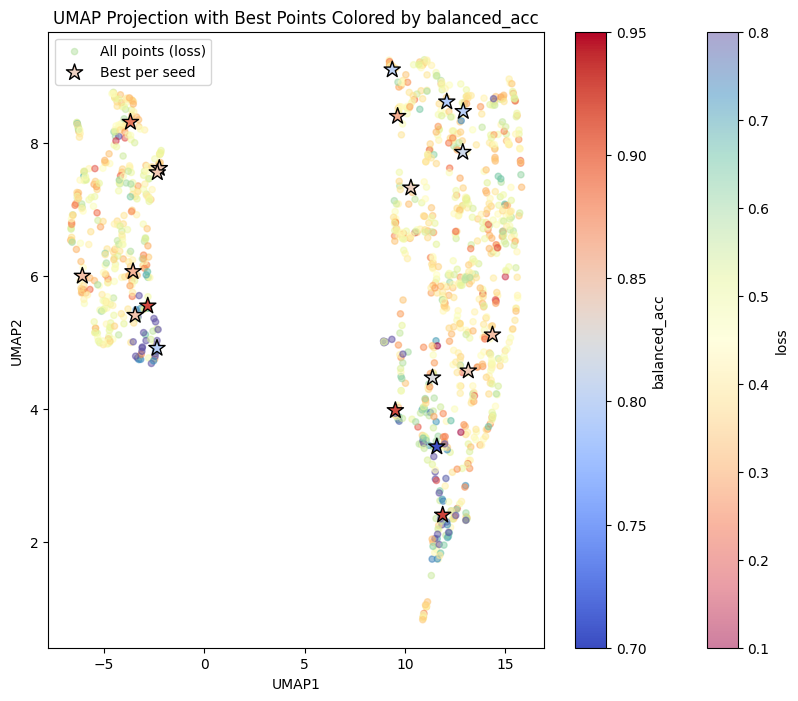

In [96]:
import matplotlib.pyplot as plt

# 假设你想用的指标名，比如 'balanced_acc'
metric_name = 'balanced_acc'

# 把df_metrics的索引转换成列方便合并
df_metrics_reset = df_metrics.reset_index()

# 只取test_size=0.3这部分（如果你有多test_size要过滤）
df_metrics_03 = df_metrics_reset[df_metrics_reset['test_size'] == 0.3]

# 给best_rows合并对应指标
best_with_metrics = best_rows.merge(
    df_metrics_03[['seed', metric_name]],
    on='seed',
    how='left'
)

plt.figure(figsize=(10, 8))

# 所有点，loss颜色
sc_loss = plt.scatter(
    df['UMAP1'], df['UMAP2'],
    c=df['loss'],
    cmap='Spectral',
    alpha=0.5,
    s=20,
    vmin=0.1,
    vmax=0.8,
    label='All points (loss)'
)
cbar_loss = plt.colorbar(sc_loss)
cbar_loss.set_label('loss')

# 用metric的颜色画每个seed最佳点（五角星）
sc = plt.scatter(
    best_with_metrics['UMAP1'], best_with_metrics['UMAP2'],
    c=best_with_metrics[metric_name],
    cmap='coolwarm',
    vmin=0.7,
    vmax=0.95,
    s=150,
    marker='*',
    edgecolor='k',
    label='Best per seed'
)
cbar_metric = plt.colorbar(sc)
cbar_metric.set_label(metric_name)

# ❌ 去掉 seed 的文字标注（这一段被删除）
# for _, row in best_with_metrics.iterrows():
#     plt.text(row['UMAP1'] + 0.02, row['UMAP2'] + 0.02, str(row['seed']),
#              fontsize=9, weight='bold', color='black')

plt.title(f"UMAP Projection with Best Points Colored by {metric_name}")
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()


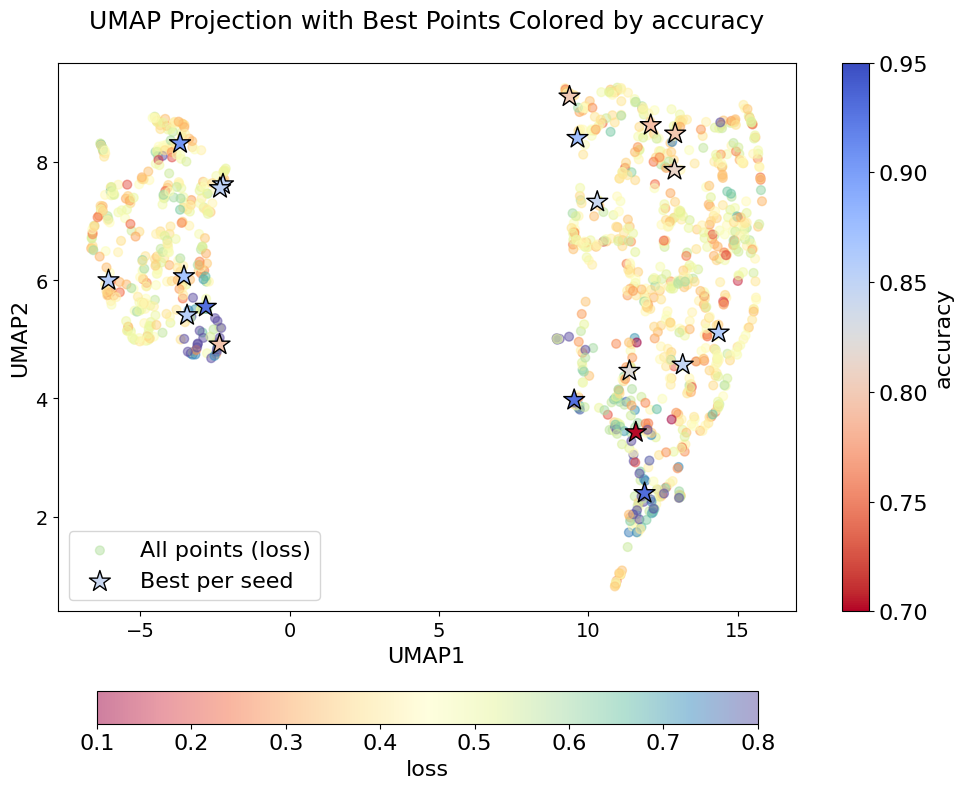

In [66]:
import matplotlib.pyplot as plt
import os

metric_name = 'accuracy'
metric_col = 'balanced_acc'
point_size = 40
star_size = 250
font_size = 14
title_font_size = 18
label_font_size = 16

df_metrics_reset = df_metrics.reset_index()
df_metrics_03 = df_metrics_reset[df_metrics_reset['test_size'] == 0.3]

best_with_metrics = best_rows.merge(
    df_metrics_03[['seed', metric_col]],
    on='seed',
    how='left'
)
best_with_metrics[metric_name] = best_with_metrics[metric_col]

fig, ax = plt.subplots(figsize=(10, 8))

# 所有点（loss）
sc_loss = ax.scatter(
    df['UMAP1'], df['UMAP2'],
    c=df['loss'],
    cmap='Spectral',
    alpha=0.5,
    s=point_size,
    vmin=0.1,
    vmax=0.8,
    label='All points (loss)'
)

# 横向colorbar，靠左，宽度缩小
cbar_loss = plt.colorbar(
    sc_loss, ax=ax, orientation='horizontal',
    pad=0.12, fraction=0.05,  # fraction控制宽度，改小点
    anchor=(0.15, 0),  # 靠左
    shrink=15  # 进一步缩小颜色条长度
)
cbar_loss.set_label('loss', fontsize=label_font_size)
cbar_loss.ax.tick_params(labelsize=label_font_size)

# 最佳点，accuracy颜色，颜色倒转
sc = ax.scatter(
    best_with_metrics['UMAP1'], best_with_metrics['UMAP2'],
    c=best_with_metrics[metric_name],
    cmap='coolwarm_r',
    vmin=0.7,
    vmax=0.95,
    s=star_size,
    marker='*',
    edgecolor='k',
    label='Best per seed'
)

# 右侧colorbar，accuracy
cbar_metric = plt.colorbar(sc, ax=ax)
cbar_metric.set_label(metric_name, fontsize=label_font_size)
cbar_metric.ax.tick_params(labelsize=label_font_size)

ax.set_title(f"UMAP Projection with Best Points Colored by {metric_name}", fontsize=title_font_size, pad=25)
ax.set_xlabel('UMAP1', fontsize=label_font_size)
ax.set_ylabel('UMAP2', fontsize=label_font_size)

ax.legend(fontsize=label_font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()

output_folder = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
output_path = os.path.join(output_folder, "UMAP_best_points_accuracy_loss.png")
plt.savefig(output_path, dpi=300)

plt.show()


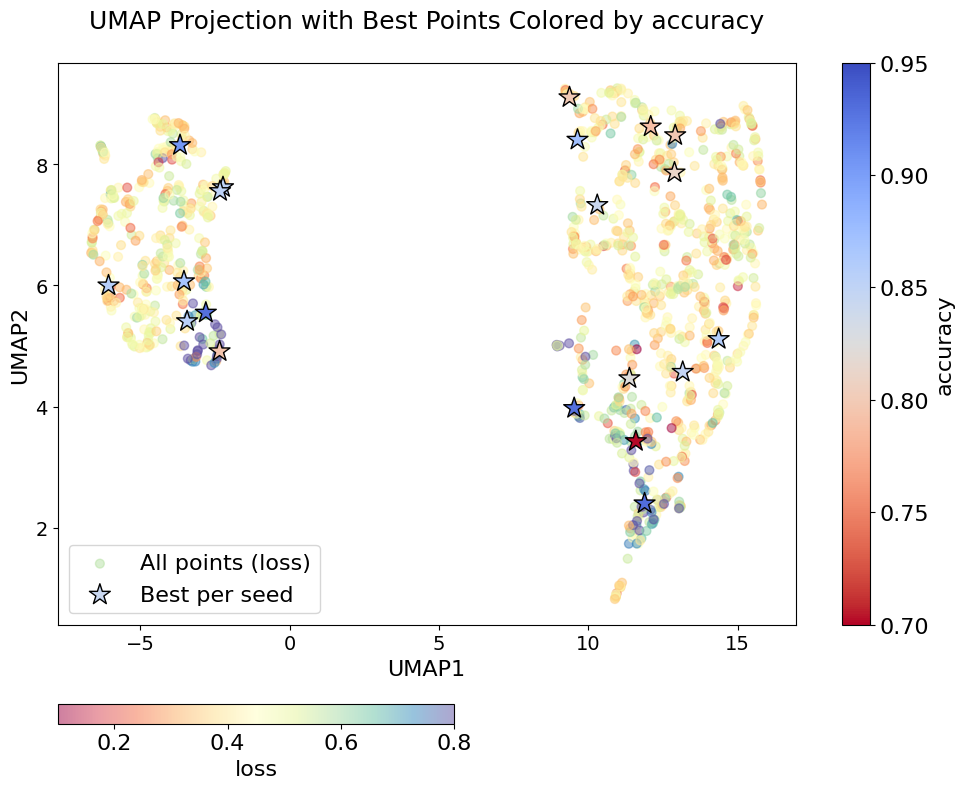

In [40]:
import matplotlib.pyplot as plt
import os

metric_name = 'accuracy'
metric_col = 'balanced_acc'
point_size = 40
star_size = 250
font_size = 14
title_font_size = 18
label_font_size = 16

df_metrics_reset = df_metrics.reset_index()
df_metrics_03 = df_metrics_reset[df_metrics_reset['test_size'] == 0.3]

best_with_metrics = best_rows.merge(
    df_metrics_03[['seed', metric_col]],
    on='seed',
    how='left'
)
best_with_metrics[metric_name] = best_with_metrics[metric_col]

fig, ax = plt.subplots(figsize=(10, 8))

# 所有点（loss）
sc_loss = ax.scatter(
    df['UMAP1'], df['UMAP2'],
    c=df['loss'],
    cmap='Spectral',
    alpha=0.5,
    s=point_size,
    vmin=0.1,
    vmax=0.8,
    label='All points (loss)'
)

# 横向colorbar，靠左，稍宽一点
cbar_loss = plt.colorbar(
    sc_loss, ax=ax, orientation='horizontal',
    pad=0.12, fraction=0.03,  # 调整宽度从0.03改为0.05
    anchor=(0, 0),
    shrink=5  # 稍微放大一些
)
cbar_loss.set_label('loss', fontsize=label_font_size)
cbar_loss.ax.tick_params(labelsize=label_font_size)

# 最佳点，accuracy颜色，颜色倒转
sc = ax.scatter(
    best_with_metrics['UMAP1'], best_with_metrics['UMAP2'],
    c=best_with_metrics[metric_name],
    cmap='coolwarm_r',
    vmin=0.7,
    vmax=0.95,
    s=star_size,
    marker='*',
    edgecolor='k',
    label='Best per seed'
)

# 右侧colorbar，accuracy
cbar_metric = plt.colorbar(sc, ax=ax)
cbar_metric.set_label(metric_name, fontsize=label_font_size)
cbar_metric.ax.tick_params(labelsize=label_font_size)

ax.set_title(f"UMAP Projection with Best Points Colored by {metric_name}", fontsize=title_font_size, pad=25)
ax.set_xlabel('UMAP1', fontsize=label_font_size)
ax.set_ylabel('UMAP2', fontsize=label_font_size)

ax.legend(fontsize=label_font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()

output_folder = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
output_path = os.path.join(output_folder, "UMAP_best_points_accuracy_loss.png")
plt.savefig(output_path, dpi=300)

plt.show()


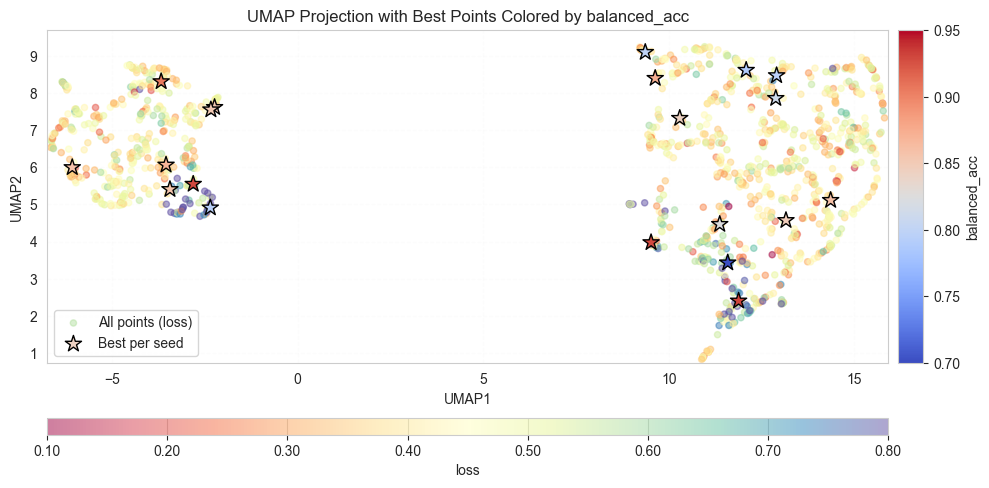

In [177]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

metric_name = 'balanced_acc'

# 假设你已准备好 best_with_metrics 和 df

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')  # 坐标轴比例1:1

divider = make_axes_locatable(ax)
cax_bottom = divider.append_axes("bottom", size="5%", pad=0.55)  # loss colorbar 放底部
cax_right = divider.append_axes("right", size="3%", pad=0.1)    # metric colorbar 放右侧

# loss颜色散点
sc_loss = ax.scatter(
    df['UMAP1'], df['UMAP2'],
    c=df['loss'],
    cmap='Spectral',
    alpha=0.5,
    s=20,
    vmin=0.1,
    vmax=0.8,
    label='All points (loss)'
)
cbar_loss = plt.colorbar(sc_loss, cax=cax_bottom, orientation='horizontal')
cbar_loss.set_label('loss')
cbar_loss.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))

# best点，metric颜色
sc_best = ax.scatter(
    best_with_metrics['UMAP1'], best_with_metrics['UMAP2'],
    c=best_with_metrics[metric_name],
    cmap='coolwarm',
    vmin=0.7,
    vmax=0.95,
    s=150,
    marker='*',
    edgecolor='k',
    label='Best per seed'
)
cbar_metric = plt.colorbar(sc_best, cax=cax_right)
cbar_metric.set_label(metric_name)
cbar_metric.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))

ax.set_xlim(df['UMAP1'].min() - 0.1, df['UMAP1'].max() + 0.1)
ax.set_ylim(df['UMAP2'].min() - 0.1, 9.7)  # UMAP2最大值限制10以内

ax.set_title(f"UMAP Projection with Best Points Colored by {metric_name}")
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.05)

plt.tight_layout()

# 保存图像，路径自己确认一下
title_str = f"UMAP Projection with Best Points Colored by {metric_name}"
filename = title_str.replace(' ', '_') + ".png"
save_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
full_path = save_path + "\\" + filename

plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()



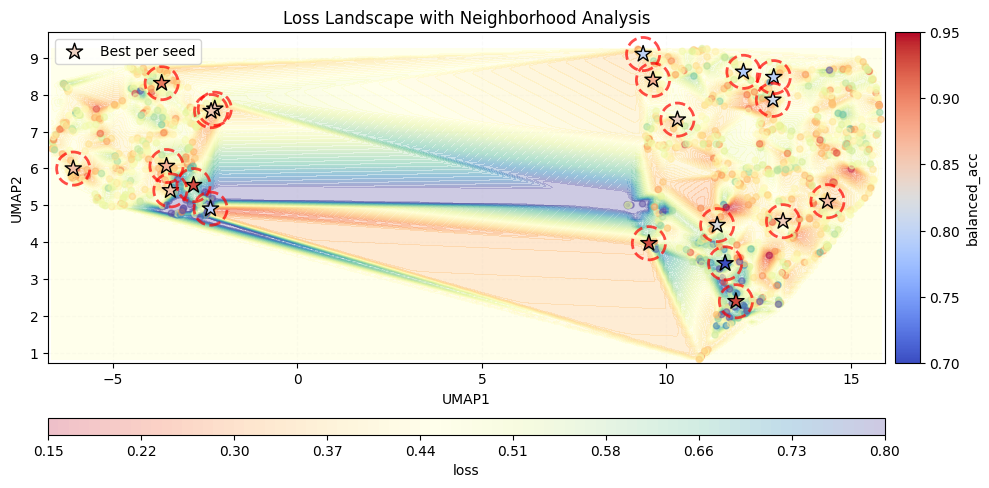

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
from matplotlib.path import Path
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.widgets import PolygonSelector

class ROISelector:
    def __init__(self, ax, x, y, onselect_callback):
        self.ax = ax
        self.canvas = ax.figure.canvas
        self.x = x
        self.y = y
        self.onselect_callback = onselect_callback
        self.selector = PolygonSelector(ax, self.onselect, useblit=True)
        self.poly = None

    def onselect(self, verts):
        path = Path(verts)
        mask = path.contains_points(np.column_stack((self.x, self.y)))
        self.onselect_callback(mask, verts)
        self.disconnect()

    def disconnect(self):
        self.selector.disconnect_events()
        self.canvas.draw_idle()

def plot_with_manual_roi(df, best_rows, metric_values=None,
                         radius_ratio=0.02, grid_resolution=200, sigma=0.8):

    x, y, z = df['UMAP1'], df['UMAP2'], df['loss']
    xi = np.linspace(x.min(), x.max(), grid_resolution)
    yi = np.linspace(y.min(), y.max(), grid_resolution)
    xi, yi = np.meshgrid(xi, yi)

    zi = griddata((x, y), z, (xi, yi), method='linear', fill_value=np.nan)
    zi_filled = np.nan_to_num(zi, nan=np.nanmean(z))
    zi_smooth = gaussian_filter(zi_filled, sigma=sigma)
    zi_smooth = np.clip(zi_smooth, 0.1, 0.8)

    x_range = x.max() - x.min()
    y_range = y.max() - y.min()
    radius = max(x_range, y_range) * radius_ratio

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')

    divider = make_axes_locatable(ax)
    cax_bottom = divider.append_axes("bottom", size="5%", pad=0.55)
    cax_right = divider.append_axes("right", size="3%", pad=0.1)

    cmap = plt.get_cmap('Spectral')
    contour = ax.contourf(xi, yi, zi_smooth, levels=100, cmap=cmap, alpha=0.3, vmin=0.1, vmax=0.8)

    cbar = plt.colorbar(contour, cax=cax_bottom, orientation='horizontal')
    cbar.set_label('loss')
    cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))

    sc = ax.scatter(x, y, c=z, cmap=cmap, vmin=0.1, vmax=0.8, s=20, alpha=0.5)

    if metric_values is not None:
        sc_best = ax.scatter(best_rows['UMAP1'], best_rows['UMAP2'], c=metric_values,
                             cmap='coolwarm', vmin=0.7, vmax=0.95,
                             s=150, marker='*', edgecolor='k', label='Best per seed')
        cbar2 = plt.colorbar(sc_best, cax=cax_right)
        cbar2.set_label('balanced_acc')
        cbar2.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))
    else:
        ax.scatter(best_rows['UMAP1'], best_rows['UMAP2'], color='red',
                   s=150, marker='*', edgecolor='k', label='Best per seed')

    for idx, row in best_rows.iterrows():
        circle = Circle((row['UMAP1'], row['UMAP2']), radius,
                        fill=False, edgecolor='red', linewidth=2, linestyle='--', alpha=0.7)
        ax.add_patch(circle)

    ax.set_xlim(x.min() - 0.1, x.max() + 0.1)
    ax.set_ylim(y.min() - 0.1, 9.7)

    ax.set_title("Loss Landscape with Neighborhood Analysis")
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.05)

    def on_roi_selected(mask, verts):
        ax.scatter(x[~mask], y[~mask], color='gray', alpha=0.2, s=15, label='Masked')
        poly = Polygon(verts, closed=True, edgecolor='black', linewidth=2, linestyle='--', facecolor='none')
        ax.add_patch(poly)
        plt.draw()

    ROISelector(ax, x, y, onselect_callback=on_roi_selected)

    plt.tight_layout()

    # 保存图像
    title_str = ax.get_title()
    filename = title_str.replace(' ', '_') + ".png"
    save_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
    full_path = save_path + "\\" + filename
    plt.savefig(full_path, dpi=300, bbox_inches='tight')

    plt.show()

# 调用
plot_with_manual_roi(df, best_with_metrics, metric_values=best_with_metrics['balanced_acc'])


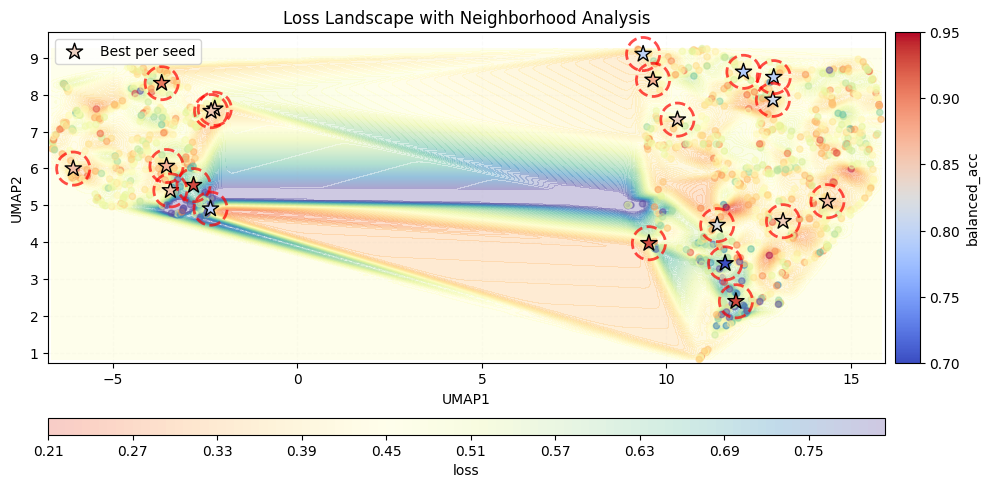

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle
from matplotlib.path import Path
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.widgets import PolygonSelector

class ROISelector:
    def __init__(self, ax, x, y, onselect_callback):
        self.ax = ax
        self.canvas = ax.figure.canvas
        self.x = x
        self.y = y
        self.onselect_callback = onselect_callback
        self.selector = PolygonSelector(ax, self.onselect, useblit=True)
        self.poly = None

    def onselect(self, verts):
        path = Path(verts)
        mask = path.contains_points(np.column_stack((self.x, self.y)))
        self.onselect_callback(mask, verts)
        self.disconnect()

    def disconnect(self):
        self.selector.disconnect_events()
        self.canvas.draw_idle()

def plot_with_manual_roi(df, best_rows, metric_values=None,
                         radius_ratio=0.02, grid_resolution=200, sigma=1.5):

    x, y, z = df['UMAP1'], df['UMAP2'], df['loss']
    xi = np.linspace(x.min(), x.max(), grid_resolution)
    yi = np.linspace(y.min(), y.max(), grid_resolution)
    xi, yi = np.meshgrid(xi, yi)

    zi = griddata((x, y), z, (xi, yi), method='linear', fill_value=np.nan)
    zi_filled = np.nan_to_num(zi, nan=np.nanmean(z))
    zi_smooth = gaussian_filter(zi_filled, sigma=sigma)
    zi_smooth = np.clip(zi_smooth, 0.1, 0.8)

    x_range = x.max() - x.min()
    y_range = y.max() - y.min()
    radius = max(x_range, y_range) * radius_ratio

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')

    divider = make_axes_locatable(ax)
    cax_bottom = divider.append_axes("bottom", size="5%", pad=0.55)
    cax_right = divider.append_axes("right", size="3%", pad=0.1)

    cmap = plt.get_cmap('Spectral')
    contour = ax.contourf(xi, yi, zi_smooth, levels=100, cmap=cmap, alpha=0.3, vmin=0.1, vmax=0.8)

    cbar = plt.colorbar(contour, cax=cax_bottom, orientation='horizontal')
    cbar.set_label('loss')
    cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))

    sc = ax.scatter(x, y, c=z, cmap=cmap, vmin=0.1, vmax=0.8, s=20, alpha=0.5)

    if metric_values is not None:
        sc_best = ax.scatter(best_rows['UMAP1'], best_rows['UMAP2'], c=metric_values,
                             cmap='coolwarm', vmin=0.7, vmax=0.95,
                             s=150, marker='*', edgecolor='k', label='Best per seed')
        cbar2 = plt.colorbar(sc_best, cax=cax_right)
        cbar2.set_label('balanced_acc')
        cbar2.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v:.2f}'))
    else:
        ax.scatter(best_rows['UMAP1'], best_rows['UMAP2'], color='red',
                   s=150, marker='*', edgecolor='k', label='Best per seed')

    for idx, row in best_rows.iterrows():
        circle = Circle((row['UMAP1'], row['UMAP2']), radius,
                        fill=False, edgecolor='red', linewidth=2, linestyle='--', alpha=0.7)
        ax.add_patch(circle)

    ax.set_xlim(x.min() - 0.1, x.max() + 0.1)
    ax.set_ylim(y.min() - 0.1, 9.7)

    ax.set_title("Loss Landscape with Neighborhood Analysis")
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.05)

    def on_roi_selected(mask, verts):
        ax.scatter(x[~mask], y[~mask], color='gray', alpha=0.2, s=15, label='Masked')
        poly = Polygon(verts, closed=True, edgecolor='black', linewidth=2, linestyle='--', facecolor='none')
        ax.add_patch(poly)
        plt.draw()

    ROISelector(ax, x, y, onselect_callback=on_roi_selected)

    plt.tight_layout()

    # 保存图像
    title_str = ax.get_title()
    filename = title_str.replace(' ', '_') + ".png"
    save_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
    full_path = save_path + "\\" + filename
    plt.savefig(full_path, dpi=300, bbox_inches='tight')

    plt.show()

# 调用
plot_with_manual_roi(df, best_with_metrics, metric_values=best_with_metrics['balanced_acc'])


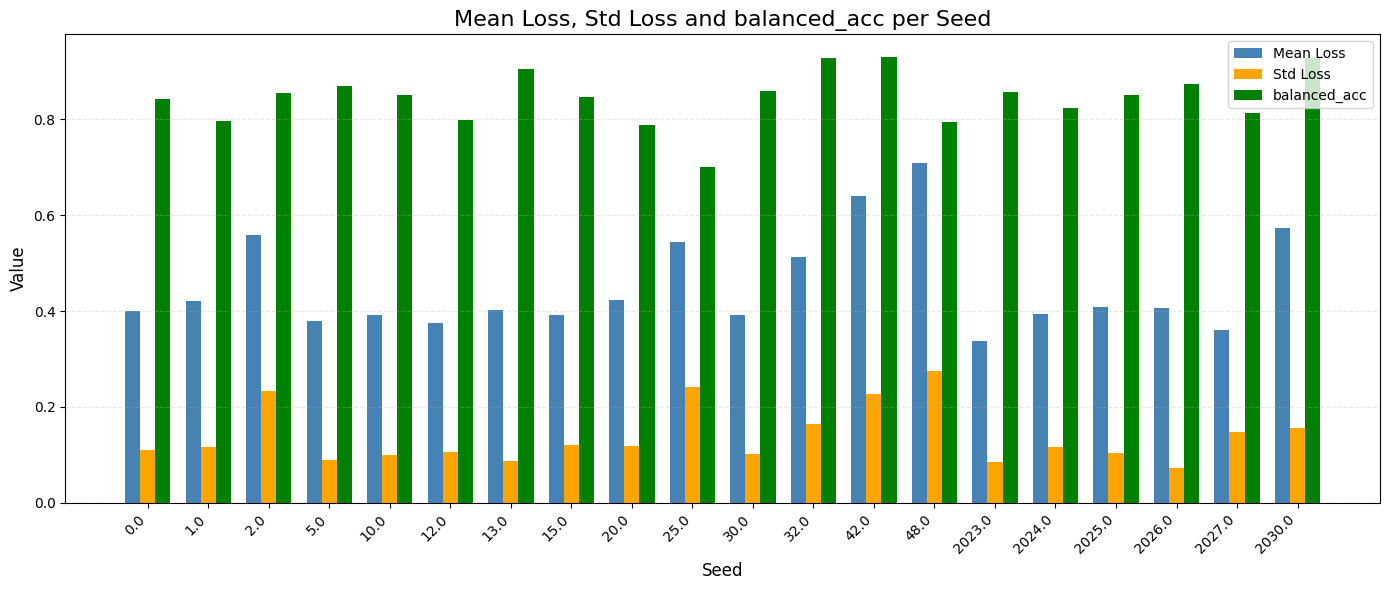

In [104]:
def plot_seed_loss_metric_stats(stats_df, metric_values, metric_name='balanced_acc'):
    seeds = stats_df['seed'].astype(str)
    mean_losses = stats_df['mean_loss']
    std_losses = stats_df['std_loss']
    metrics = metric_values

    x = np.arange(len(seeds))
    width = 0.25  # 三组柱子宽度调整

    fig, ax = plt.subplots(figsize=(14, 6))

    bars_mean = ax.bar(x - width, mean_losses, width, label='Mean Loss', color='steelblue')
    bars_std = ax.bar(x, std_losses, width, label='Std Loss', color='orange')
    bars_metric = ax.bar(x + width, metrics, width, label=metric_name, color='green')

    ax.set_xlabel('Seed', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'Mean Loss, Std Loss and {metric_name} per Seed', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(seeds, rotation=45, ha='right')

    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# 调用示例（传入 stats_df 和 metric_values）
plot_seed_loss_metric_stats(stats_df, best_with_metrics[metric_name], metric_name=metric_name)


Figure saved to: C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures\bubble_loss_vs_accuracy.png


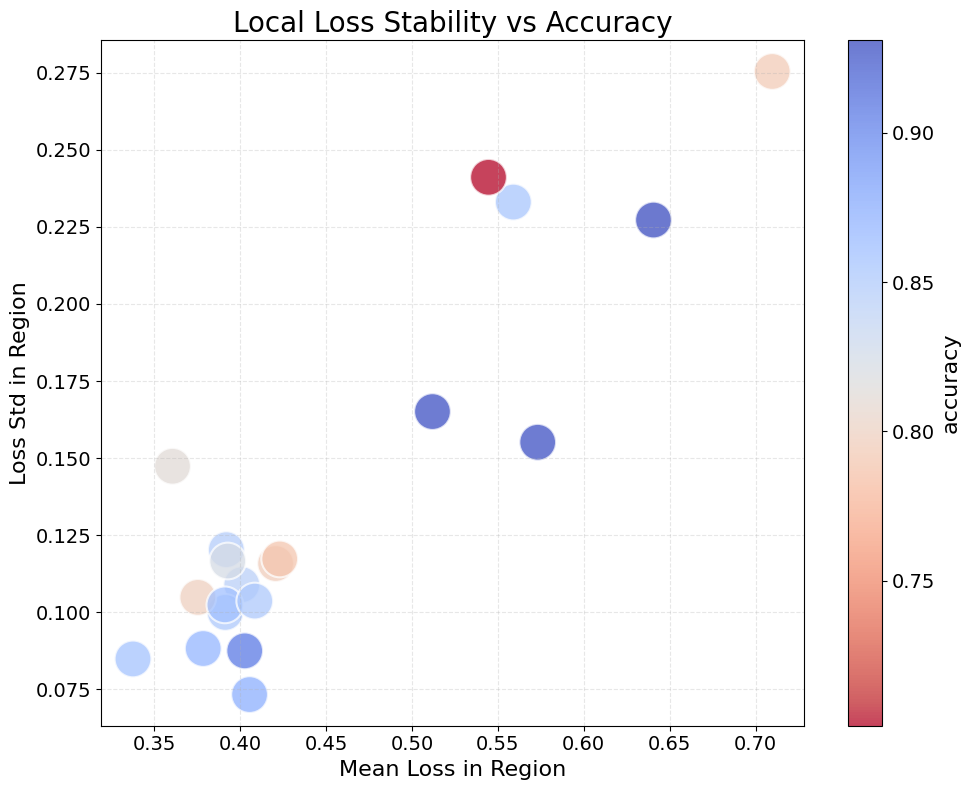

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_loss_bubble_by_circle(df_all, best_rows, metric_col='balanced_acc', radius_ratio=0.02, save_dir=None):
    """
    绘制 Loss Bubble Plot:
    横轴：区域内平均 loss，纵轴：loss 的标准差，颜色：accuracy
    """

    # 改名为 accuracy
    metric_label = 'accuracy'

    # 计算圆圈半径
    x_all = df_all['UMAP1']
    y_all = df_all['UMAP2']
    z_all = df_all['loss']
    x_range = x_all.max() - x_all.min()
    y_range = y_all.max() - y_all.min()
    radius = max(x_range, y_range) * radius_ratio

    # 遍历每个圆圈，计算局部 loss 的 mean 和 std
    mean_losses = []
    std_losses = []
    metric_values = []

    for _, row in best_rows.iterrows():
        cx, cy = row['UMAP1'], row['UMAP2']
        metric = row[metric_col]

        dists = np.sqrt((x_all - cx) ** 2 + (y_all - cy) ** 2)
        mask = dists <= radius
        local_loss = z_all[mask]

        mean_losses.append(local_loss.mean())
        std_losses.append(local_loss.std())
        metric_values.append(metric)

    # 绘图
    plt.figure(figsize=(10, 8))
    sizes = [700] * len(mean_losses)

    sc = plt.scatter(mean_losses, std_losses, s=sizes, c=metric_values,
                     cmap='coolwarm_r',  # ✅ 颜色反转
                     alpha=0.75, edgecolors='white', linewidth=1.5)

    cbar = plt.colorbar(sc)
    cbar.set_label(metric_label, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    # ✅ 去掉文字标注（原本显示 seed 的）
    # for i in range(len(seeds)):
    #     plt.text(mean_losses[i], std_losses[i], seeds[i],
    #              fontsize=8, ha='center', va='center', color='black')

    plt.xlabel('Mean Loss in Region', fontsize=16)
    plt.ylabel('Loss Std in Region', fontsize=16)
    plt.title('Local Loss Stability vs Accuracy', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()

    # 保存图像
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        filename = "bubble_loss_vs_accuracy.png"
        filepath = os.path.join(save_dir, filename)
        plt.savefig(filepath, dpi=300)
        print(f"Figure saved to: {filepath}")

    plt.show()
plot_loss_bubble_by_circle(
    df_all=df,
    best_rows=best_with_metrics,
    metric_col='balanced_acc',  # 依然传入原列名
    save_dir=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\Thesis write up\figures"
)


In [117]:
df_params

test_size  seed  latent_dim  hidden_dim_factor        lr  \
0         0.3     0         128           0.500000  0.000553   
1         0.3     1          73           0.367814  0.000548   
2         0.3     2          78           0.261489  0.008242   
3         0.3     5         103           0.345603  0.003921   
4         0.3    10         124           0.472357  0.003456   
5         0.3    12          76           0.375821  0.001141   
6         0.3    13          66           0.473375  0.002129   
7         0.3    15         110           0.283332  0.001539   
8         0.3    20          16           0.500000  0.001414   
9         0.3    25          16           0.248046  0.010000   
10        0.3    30          82           0.240594  0.002131   
11        0.3    32         128           0.500000  0.010000   
12        0.3    42         114           0.333155  0.005096   
13        0.3    48          58           0.472267  0.008863   
14        0.3  2023          33           0.235739  0.001766   
15        0.3  2024          37           0.439459  0.005878   
16        0.3  2025         122           0.500000  0.002909   
17        0.3  2026          90           0.426141  0.001316   
18        0.3  2027          72           0.347150  0.002494   
19        0.3  2030         128           0.500000  0.010000   

    supervisor_hidden_dim  epochs  batch_size  
0                      32      30          32  
1                      28      56          32  
2                      12      13         128  
3                      15      21         128  
4                      31      24         128  
5                      31      59          64  
6                      23      37         128  
7                      20      49          32  
8                      26      60          32  
9                      21      18          32  
10                     12      31          32  
11                      8      11          64  
12                     22      19          64  
13                     23      88         128  
14                     23      33         128  
15                     11      22          64  
16                     25      22         128  
17                     32      19          64  
18                     20      44          32  
19                     14      30         128

In [119]:
df_metrics

test_size  seed  latent_dim  hidden_dim_factor        lr  \
0         0.3     0         128           0.500000  0.000553   
1         0.3     1          73           0.367814  0.000548   
2         0.3     2          78           0.261489  0.008242   
3         0.3     5         103           0.345603  0.003921   
4         0.3    10         124           0.472357  0.003456   
5         0.3    12          76           0.375821  0.001141   
6         0.3    13          66           0.473375  0.002129   
7         0.3    15         110           0.283332  0.001539   
8         0.3    20          16           0.500000  0.001414   
9         0.3    25          16           0.248046  0.010000   
10        0.3    30          82           0.240594  0.002131   
11        0.3    32         128           0.500000  0.010000   
12        0.3    42         114           0.333155  0.005096   
13        0.3    48          58           0.472267  0.008863   
14        0.3  2023          33           0.235739  0.001766   
15        0.3  2024          37           0.439459  0.005878   
16        0.3  2025         122           0.500000  0.002909   
17        0.3  2026          90           0.426141  0.001316   
18        0.3  2027          72           0.347150  0.002494   
19        0.3  2030         128           0.500000  0.010000   

    supervisor_hidden_dim  epochs  batch_size  
0                      32      30          32  
1                      28      56          32  
2                      12      13         128  
3                      15      21         128  
4                      31      24         128  
5                      31      59          64  
6                      23      37         128  
7                      20      49          32  
8                      26      60          32  
9                      21      18          32  
10                     12      31          32  
11                      8      11          64  
12                     22      19          64  
13                     23      88         128  
14                     23      33         128  
15                     11      22          64  
16                     25      22         128  
17                     32      19          64  
18                     20      44          32  
19                     14      30         128

In [121]:
df_all_losses

test_size  seed      loss  iter
0           0.3     0  0.578248     1
1           0.3     0  0.454152     2
2           0.3     0  0.433123     3
3           0.3     0  0.393780     4
4           0.3     0  0.439512     5
...         ...   ...       ...   ...
1195        0.3  2030  0.882782    56
1196        0.3  2030  0.594276    57
1197        0.3  2030  0.485217    58
1198        0.3  2030  0.497176    59
1199        0.3  2030  0.924248    60

[1200 rows x 4 columns]